In [1]:
from f_drosophila_infer import *
from f_train import *
from f_data_prep import *
from sklearn import linear_model

In [2]:
with open('./pickles/LAD_sqrd_quad.pkl', 'rb') as f:
    LAD_sqrd_quad = pickle.load(f)
    
with open('./pickles/skl_quad.pkl', 'rb') as f:
    skl_quad = pickle.load(f)

In [3]:
data_all = np.loadtxt('../data_complete.txt')
median = np.median(data_all, axis=0)
# data_all = data_all - median
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])
all_diff = np.vstack([all_bin[i+1]-all_bin[i] for i in range(5)])

complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

quad_init = np.copy(all_init)
for i in range(len(comp_ind)-1):
    for j in range(i+1, len(comp_ind)):
        quad_init = np.hstack((quad_init, (all_init[:,comp_ind[i]]*all_init[:,comp_ind[j]])[:,None]))
print('initial gene with quad var: ', quad_init.shape)

y_actual = np.vstack([all_bin[i+1] for i in range(5)])
print('Target gene at t_+1: ', y_actual.shape)

initial gene with quad var:  (30390, 450)
Target gene at t_+1:  (30390, 99)


In [8]:
error_cell_list=[]
for i in range(10):
    w = LAD_sqrd_quad[0]['w'][i]
    bias = LAD_sqrd_quad[0]['bias'][i]
    y_pred = bias + quad_init.dot(w)
    error = np.max(np.abs(y_pred - all_diff), axis=1)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.max(error_bin, axis=0)
    error_cell_list.append(error_cell)
error_cell_LAD = np.hstack((error_cell_list)).flatten()

error_cell_list = []
for i in range(10):
    w = skl_quad[0]['coef'][i]
    bias = skl_quad[0]['intercept'][i]
    y_pred = bias + quad_init.dot(w.T)
    error = np.max(np.abs(y_pred - all_diff), axis=1)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.max(error_bin, axis=0)
    error_cell_list.append(error_cell)
error_cell_skl = np.hstack((error_cell_list)).flatten()

In [5]:
error_0_LAD = [np.max(np.abs(LAD_sqrd_quad[0]['y_actual'][i] - LAD_sqrd_quad[0]['y_pred'][i]), axis=1) for i in range(10)]
error_0_skl = [np.max(np.abs(skl_quad[0]['y_actual'][i] - skl_quad[0]['y_pred'][i]), axis=1) for i in range(10)]

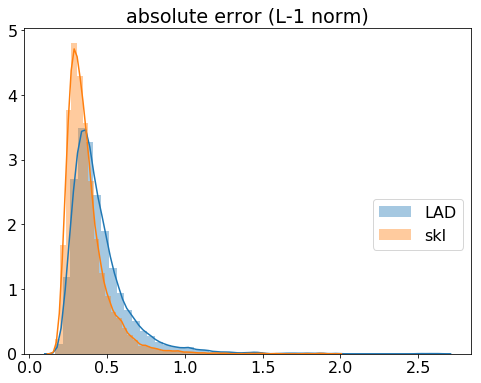

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(error_cell_LAD, label='LAD')
sns.distplot(np.hstack(error_cell_skl), label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('absolute error (L-1 norm)')
plt.show()

In [13]:
import scanpy

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
